In [1]:
%matplotlib inline
%pdb off

import simulate
import withdrawal
import plot
import market
from portfolio import Portfolio
import harvesting

Automatic pdb calling has been turned OFF


In [2]:
series = market.Returns_US_1871()

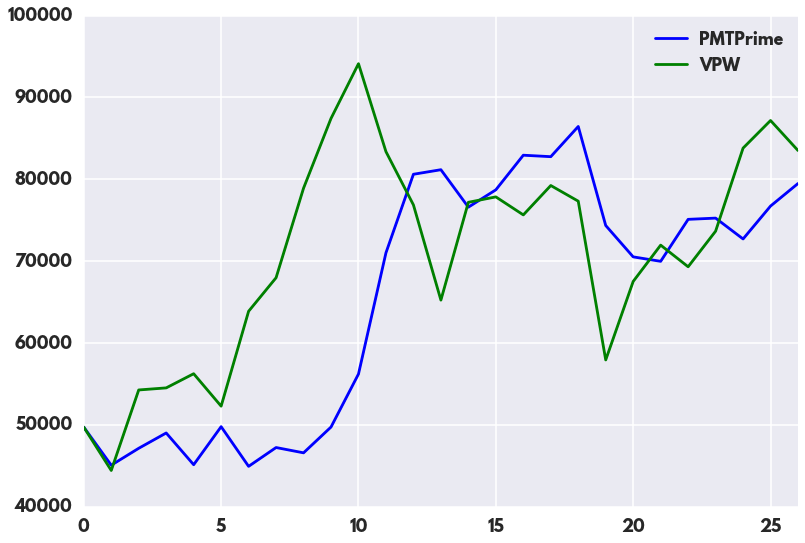

In [5]:
def sim(series, years=30):
    p = Portfolio(600000,400000)
    w = withdrawal.PMTPrime(p, final_age=100, discount_rate=0.0372).withdrawals()

    annual = []
    data = w.send(None)
    annual.append(data)
    years -= 1

    for _, d in zip(range(years), series):
        data = w.send(d)
        annual.append(data)
    return annual

year = 1990

def lens(n):
#    return float(n.portfolio_bonds/n.portfolio_n)
    return float(n.withdraw_r)
#    return float(n.portfolio_r)

x = sim(series.iter_from(year))
plot.seaborn.tsplot([lens(n) for n in x], color='blue', legend=True, condition='PMTPrime')

x = simulate.withdrawals(series.iter_from(year), years=30,
                        harvesting = harvesting.N_60_RebalanceHarvesting,
                        withdraw = withdrawal.VPW)
plot.seaborn.tsplot([lens(n) for n in x], color='green', legend=True, condition='VPW')